## Outliers 

In [14]:
!pip install matplotlib

In [20]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rc('figure', figsize = (14,6))

In [22]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';' )

<AxesSubplot:>

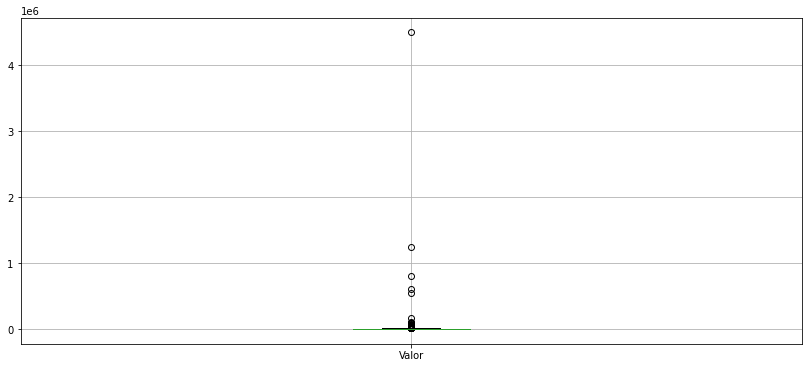

In [25]:
dados.boxplot(['Valor'])

In [26]:
dados[dados ['Valor'] >=500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [27]:
valor = dados ['Valor']

In [32]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ =Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q1 + 1.5 * IIQ

In [50]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

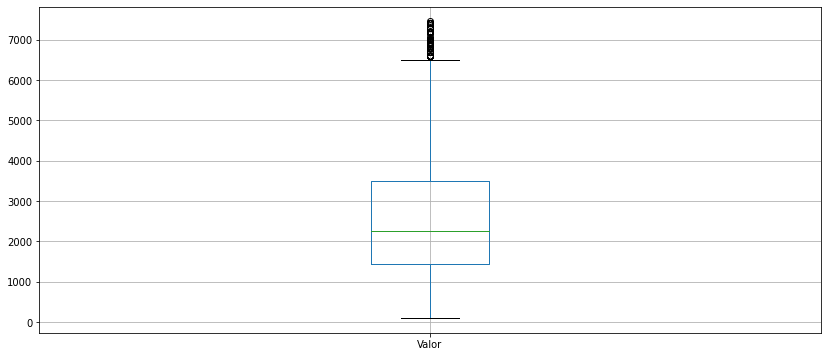

In [36]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

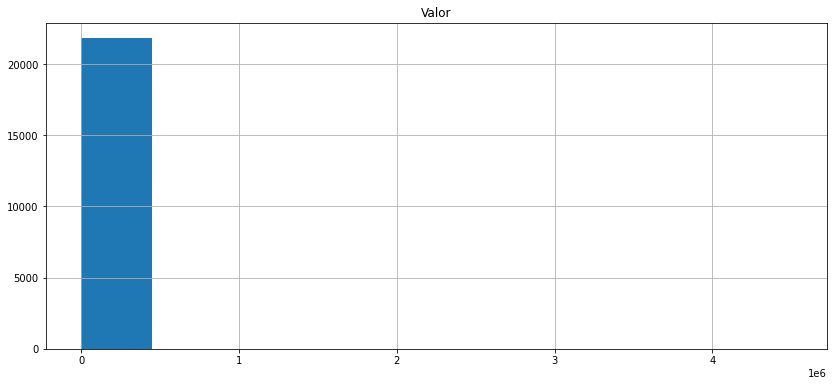

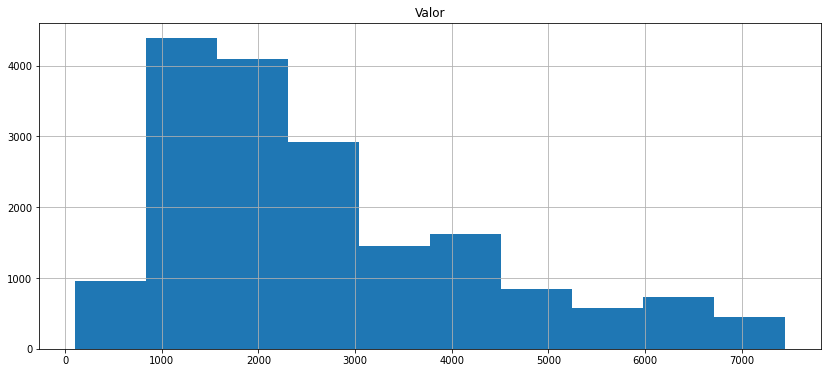

In [40]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

In [46]:
dados2=pd.read_csv('dados/aluguel_amostra.csv', sep = ';')

In [47]:
dados2

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


<AxesSubplot:>

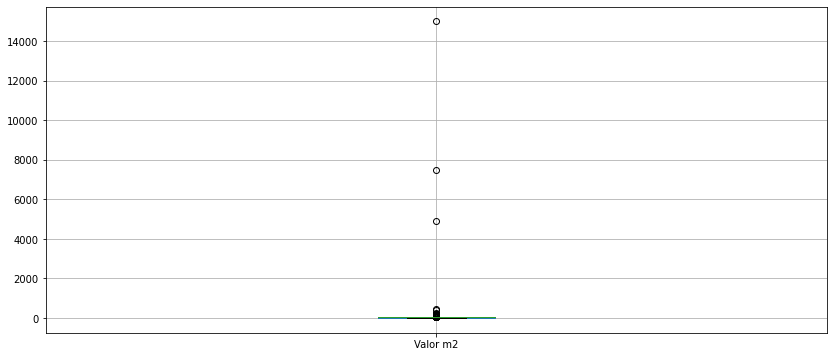

In [49]:
dados2.boxplot(['Valor m2'])

In [55]:
dados2[dados2 ['Valor m2'] >=5000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
535,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
7493,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


## identificando outliers 2

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

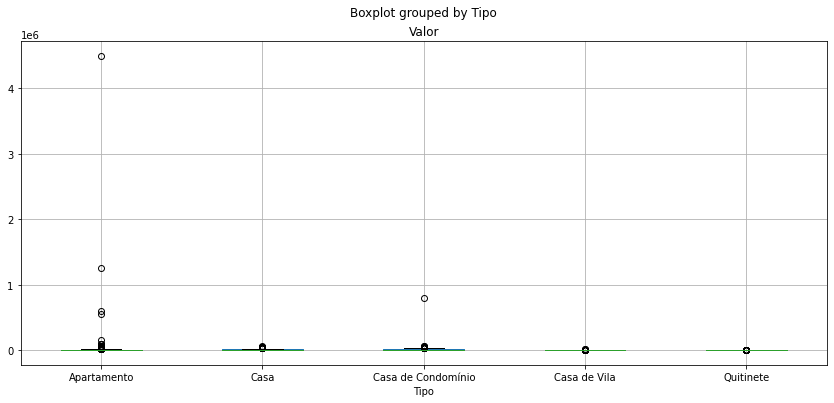

In [90]:
dados.boxplot (['Valor'], by = ('Tipo'))

In [93]:
grupo_tipo = dados.groupby ('Tipo')['Valor']

In [94]:
type(grupo_tipo)

pandas.core.groupby.SeriesGroupBy

In [96]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ =Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q1 + 1.5 * IIQ

In [98]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [100]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [101]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [102]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [105]:
limite_superior['Casa']

14150.0

In [117]:
dadosnew = pd.DataFrame()
for Tipo in grupo_tipo.groups.keys() :
    eh_tipo = dados['Tipo'] == Tipo 
    eh_dentro_limite = (dados['Valor'] >= limite_inferior [Tipo]) & (dados['Valor'] <= limite_superior[Tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dadosnew = pd.concat([dadosnew, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

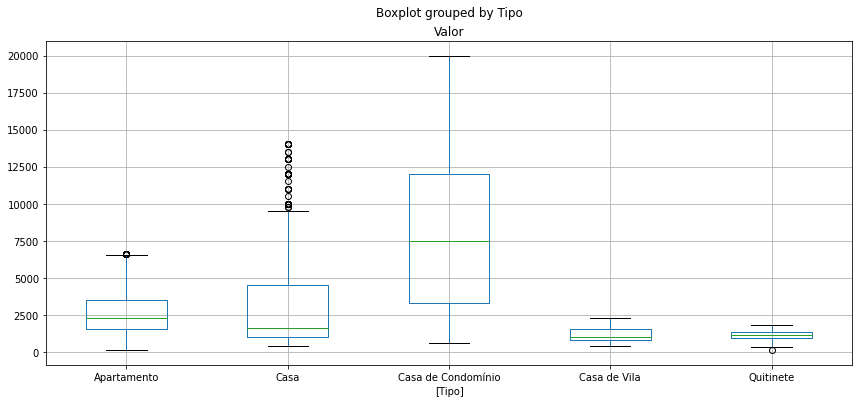

In [123]:
dadosnew.boxplot(['Valor'], by = ['Tipo'])

In [130]:
dadosnew.to_csv ('dados/aluguel_residencial_sem_outliers.csv' , sep= ';' , index = False)